<a href="https://colab.research.google.com/github/sarahlai30/Machine-Learning-INDE-577/blob/main/Supervised%20Learning/K-Nearest%20Neighbors/K_Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest Neighbors

**K-Nearest Neighbors (KNN)** is often applied in areas such as pattern recognition, data mining, and intrusion detection. KNN is valued for its simplicity and versatility in real-world scenarios.

One of the advantages of KNN is that it is non-parametric, meaning it does not make any assumptions about the underlying distribution of the data. Instead, KNN relies on the idea that similar data points exist in close proximity. By leveraging prior labeled data (training data), KNN can classify new data points based on their similarity to existing examples.



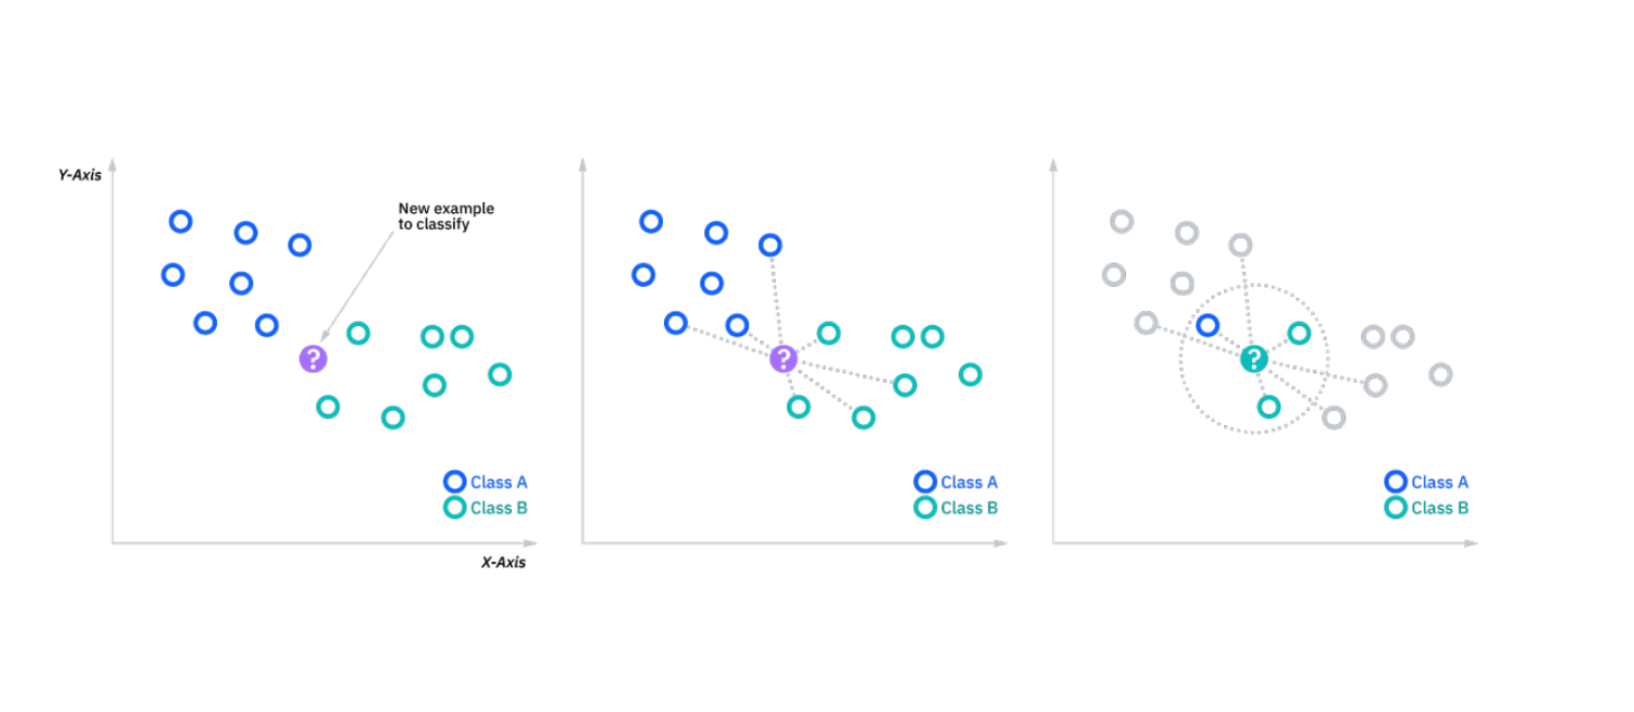

Let's say we are plotting a dataset on a graph, where each point belongs to a specific group or category. These groups often form clusters in the feature space. Now, if we introduce a new, unclassified point, the goal is to determine which group it belongs to.

The KNN algorithm assigns this point to a group by examining its "K" nearest neighbors — that is, the closest data points in the feature space.

The KNN Algorithm Steps
1. Load the data: Prepare your dataset with features and corresponding labels.
2. Choose K: Decide the number of nearest neighbors (
𝐾) you want to consider for prediction.
3. Iterate through the data:
*   Calculate distances: For each example in the dataset, calculate the distance between the query point and the current example.
*   Store distances: Add the calculated distance and the index of the example to a collection (e.g., a list or array).
4. Sort distances: Arrange the collection in ascending order based on the distances.
5. Select K nearest neighbors: Pick the first
𝐾 entries from the sorted collection.
6. Determine labels:
*   For regression, calculate the mean of the
𝐾 selected labels and return it as the prediction.
*   For classification, determine the mode (most frequent label) of the
𝐾 selected labels and return it as the predicted class.

We can practice the KNN algorithm on the wine dataset as an example.

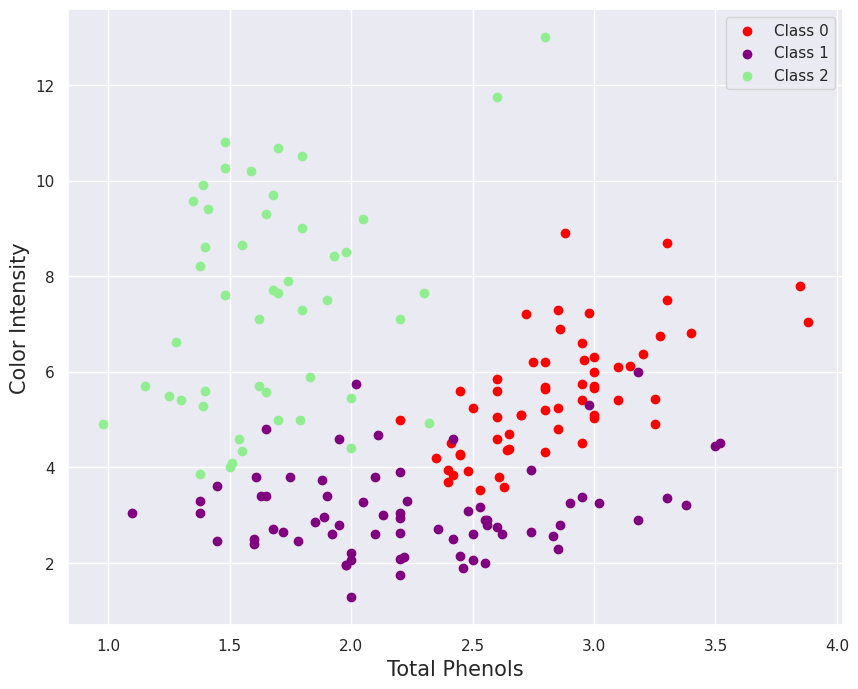

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = load_wine()
wine = pd.DataFrame(data.data, columns=data.feature_names)
wine['class'] = data.target.astype(str)  # Convert to string for categorical hue

# Set theme for plotting
sns.set_theme()
wine = pd.DataFrame(data.data, columns=data.feature_names)
wine['class'] = data.target  # Add target column for wine classes

# Define class labels and colors
classes = ["Class 0", "Class 1", "Class 2"]
colors = ["red", "purple", "lightgreen"]

# Plot the data
fig, ax = plt.subplots(figsize=(10, 8))
for wine_class, color in zip([0, 1, 2], colors):
    temp_df = wine[wine['class'] == wine_class]
    ax.scatter(temp_df["total_phenols"],
               temp_df["color_intensity"],
               c=color,
               label=classes[wine_class])

# Set plot labels and legend
ax.set_xlabel("Total Phenols", fontsize=15)
ax.set_ylabel("Color Intensity", fontsize=15)
ax.legend()
plt.show()

By plotting the observations, we can get a sense of how well-separated the classes might be based on total phenols and color intensity.

In [ ]:
X = wine[["total_phenols", "color_intensity"]].to_numpy()
y = wine["class"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

Definging our functions; distance, k_nearest_neighbors, and KNN_Predict.

In [ ]:
def distance(p, q):
    return np.sqrt(np.sum((p - q) ** 2))

# KNN helper function to find nearest labels
def k_nearest_neighbors(point, training_features, training_labels, k):
    distances = []

    for p, label in zip(training_features, training_labels):
        d = distance(point, p)
        distances.append((label, d))

    # Sort by distance and return the k closest neighbors
    distances.sort(key=lambda x: x[1])
    return distances[:k]

# KNN prediction function
def KNN_Predict(point, training_features, training_labels, k, regression=False):
    neighbors = k_nearest_neighbors(point, training_features, training_labels, k)

    if not regression:
        labels = [label for label, _ in neighbors]
        return max(set(labels), key=labels.count)
    else:
        labels = [label for label, _ in neighbors]
        return sum(labels) / k


# How do we choose K?

In order to measure the classification error for a given k, we can make a function to compute the error for a k value to help us choose our ideal k. The error rate is the proportion of misclassified points when comparing the predicted with the actual label.

In [ ]:
# Classification error function
def classification_error(test_features, test_labels, training_features, training_labels, k):
    error = 0
    for point, label in zip(test_features, test_labels):
        error += label != KNN_Predict(point, training_features, training_labels, k)
    return error / len(test_features)
possible_k = [k for k in range(1, 16, 2)]
errors = [classification_error(X_test, y_test, X_train, y_train, k) for k in possible_k]


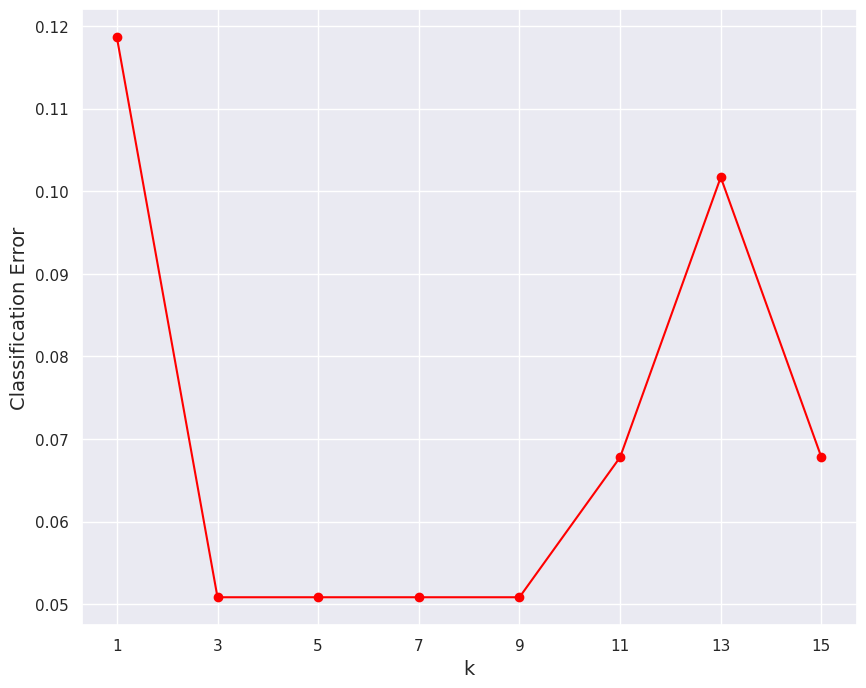

In [ ]:
possible_k = [k for k in range(1, 16, 2)]
errors = [classification_error(X_test,
                               y_test,
                               X_train,
                               y_train, k) for k in possible_k]
plt.figure(figsize = (10, 8))
plt.plot(possible_k, errors, color = 'red', marker = "o")
plt.xlabel('k', fontsize = 14)
plt.ylabel('Classification Error', fontsize = 14)
plt.xticks(possible_k)
plt.show()

Based on the plot, our optimal k is between 3-9.

One of the most common application of KNN is recommender systems. In the following code, we will construct a movie recommendation system. The dataset contains movie titles with their respective genres and the rating scores for each movie title from individuals.

In [ ]:
from google.colab import files
import pandas as pd

# Upload file
uploaded = files.upload()
movies_with_ratings = pd.read_csv("movies_with_ratings.csv")

Saving movies_with_ratings.csv to movies_with_ratings (1).csv


Our movie recommendation function will take in the name of the movie one likes, the movies dataset, and the number of titles to reccomend.

For a given movie (point), the KNN function computes the Euclidean distance between this movie's feature vector and the feature vector of every other movie in the dataset. After computing distances for all movies, the function sorts them in ascending order so the most similar movies (the "nearest neighbors") will be at the top of the list. The function selects the top k closest movies (excluding the specified movie itself) and returns the labels of the closest movies.

In [ ]:
def movie_recommendations(movie_name, df, k):
    categories = ['avg_rating', 'Action', 'Adventure', 'Animation', 'Children',
                  'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
                  'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery',
                  'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

    X = df[categories].to_numpy()
    y = df["title"].to_numpy()

    # Locate the movie in the DataFrame
    if movie_name not in df["title"].values:
        raise ValueError(f"'{movie_name}' not found in the dataset.")

    # Get the feature vector for the specified movie
    point = df.loc[df['title'] == movie_name, categories].to_numpy().flatten()

    # Find k nearest neighbors using the k_nearest_neighbors function
    neighbors = k_nearest_neighbors(point, X, y, k + 1)  # k + 1 to exclude the movie itself
    recommendations = [neighbor[0] for neighbor in neighbors[1:]]  # Exclude the movie itself

    return recommendations


# Test the function
recommendations = movie_recommendations("Toy Story", movies_with_ratings, 5)

print("Recommended Movies:")
for i, movie in enumerate(recommendations):
    print(f"{i + 1}. {movie}")

Recommended Movies:
1. Toy Story Toons: Hawaiian Vacation
2. Monsters, Inc.
3. Toy Story 2
4. Emperor's New Groove, The
5. Boxtrolls, The


The top 5 recommended movies for someone who likes Toy Story are Toy Story Toons, Monsters, Inc., Toy Story 2, The Emperor's New Groove, and The Boxtrolls.